<h1>앙상블 모델</h1>

In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# 당뇨 데이터 셋
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True,as_frame=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

# 트리 모델

최대 트리 모델

In [3]:
from sklearn.tree import DecisionTreeRegressor
f = DecisionTreeRegressor(
    max_depth = None,       # 트리의 최대 깊이
    min_samples_split = 2,  # 분할할 최대 샘플의 수 ///최소 아닌가????????
    min_samples_leaf = 1,   # 하나의 노드가 갖는 최소 샘플 수
    max_leaf_nodes = None   # 최대 트리의 단말 노드 수
)

In [4]:
f.fit(xtrain,ytrain)
print( f.get_depth(), f.get_n_leaves(), xtrain.shape )

18 259 (265, 10)


In [5]:
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

1.0 0.0036951424265220245


파라메터 튜닝

In [6]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2,3,4,5,6,7,8,9,10,None],
    'max_leaf_nodes': [3,5,7,10,13,15,17,20,25,30,40,50,None]  #10개 X 13개 = 130개 경우의 수
}
f = GridSearchCV( DecisionTreeRegressor(), params )
f.fit(xtrain,ytrain)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [2, 3, ...], 'max_leaf_nodes': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [7]:
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.4432928560714796 0.3826012387908083


In [8]:
f.best_params_

{'max_depth': 2, 'max_leaf_nodes': 5}

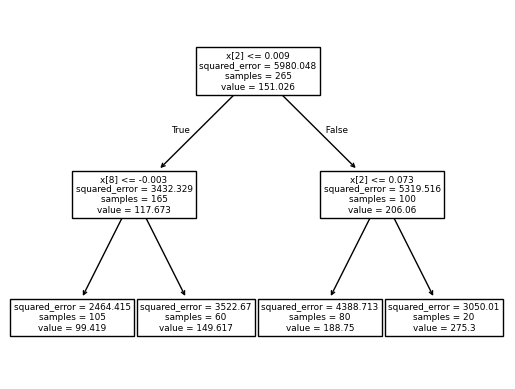

In [9]:
from sklearn.tree import plot_tree
plot_tree(f.best_estimator_)
plt.show()

# 랜덤포레스트

트리 모델 + 배깅

In [ ]:
from sklearn.ensemble import RandomForestRegressor
f = RandomForestRegressor(
    n_estimators = 100,     # 앙상블할 트리의 수
    max_features = 1,       # 사용할 변수의 비율 -> subspacing을 하지 않겠다!!!
    max_depth = None,       # 트리의 최대 깊이
    min_samples_split = 2,  # 분할할 최대 샘플의 수
    min_samples_leaf = 1,   # 하나의 노드가 갖는 최소 샘플 수
    max_leaf_nodes = None,  # 최대 트리의 단말 노드 수
    random_state = 0        # 랜덤 시드
)

In [11]:
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.9091663573179152 0.4738163695476777


트리 모델 + 배깅 + Sub-spacing

In [12]:
f = RandomForestRegressor(
    n_estimators = 100,     # 앙상블할 트리의 수
    max_features = 0.33,    # 사용할 변수의 비율
    max_depth = None,       # 트리의 최대 깊이
    min_samples_split = 2,  # 분할할 최대 샘플의 수
    min_samples_leaf = 1,   # 하나의 노드가 갖는 최소 샘플 수
    max_leaf_nodes = None,  # 최대 트리의 단말 노드 수
    random_state = 0        # 랜덤 시드
)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.9121198437511787 0.5074317605710911


모델 수에 따른 변화

In [13]:
nlist = [2,5,10,20,50,100,200,500,1000,5000,10000]
r2_train = []; r2_test = []
for n in nlist:
  f = RandomForestRegressor(n_estimators=n,max_features=0.33)
  f.fit(xtrain,ytrain)
  r2_train.append( f.score(xtrain,ytrain) )
  r2_test.append( f.score(xtest,ytest) )

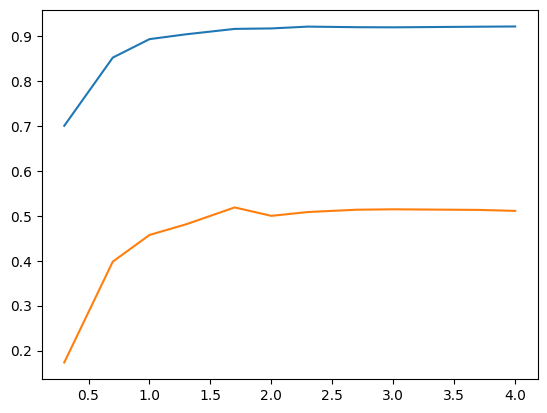

In [14]:
plt.plot(np.log10(nlist),r2_train,np.log10(nlist),r2_test)

# GBM: Gradient Boosting Machine

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
f = GradientBoostingRegressor(
    n_estimators = 100,     # 앙상블하는 트리의 수
    max_depth = 3,          # 트리의 최대 깊이             (간단한 모델!)
    min_samples_split = 2,  # 분할할 최대 샘플의 수
    min_samples_leaf = 1,   # 하나의 노드가 갖는 최소 샘플 수
    max_leaf_nodes = None,  # 최대 트리의 단말 노드 수
    random_state = 0        # 랜덤 시드
)

In [16]:
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.8801941595332317 0.4768477608744519


모델 수에 따른 변화

In [17]:
nlist = np.arange(2,200,2) #2,4,6, ..., 198까지!!!!!!!!!!
r2_train = []; r2_cv = []; r2_test = []
for n in nlist:
  f = GradientBoostingRegressor(n_estimators=n,max_depth=3)
  f.fit(xtrain,ytrain)
  r2_train.append( f.score(xtrain,ytrain) )
  r2_cv.append( cross_val_score(f,xtrain,ytrain).mean() )
  r2_test.append( f.score(xtest,ytest) )

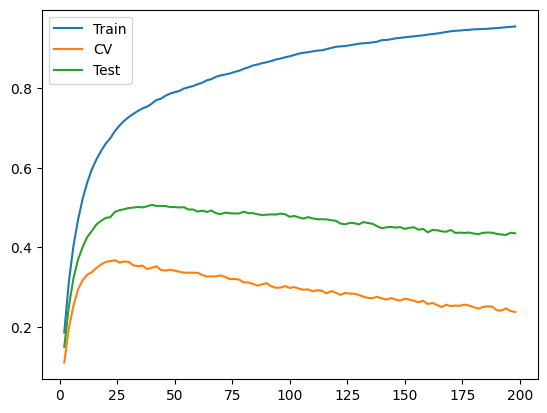

In [18]:
plt.plot(nlist,r2_train,nlist,r2_cv,nlist,r2_test)
plt.legend(['Train','CV','Test'])

# 연습문제

1. 아이리스 데이터 셋을 트리 모델을 이용하여 훈련하시오. DecisionTreeClassifier를 사용하고, 모든 파라메터는 기본값을 사용하시오. 훈련 데이터와 평가 데이터의 성능은 각각 얼마인가? 만들어진 트리 모델의 깊이와 크기는 얼마인가?

In [3]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
f = DecisionTreeClassifier()
f.fit(xtrain, ytrain)
print(f.score(xtrain, ytrain), f.score(xtest, ytest))
print(f.get_depth(), f.get_n_leaves())

1.0 1.0
6 10


2. MNIST 데이터 셋 분류 과제를 트리(DecisionTreeClassifier) 모델, 랜덤포레스트(RandomForestClassifier) 모델, GBM(GradientBoostingClassifier) 모델을 이용하여 예측하고 성능을 평가하시오. 트리 및 랜덤포레스트 모델은 max_depth, GBM 모델은 n_estimator 파라메터에 대하여만 적절히 파라메터 튜닝을 진행하시오. 각 모델의 random_state는 1으로 고정하며, 그 외의 다른 파라메터에 대해서는 기본 값으로 학습하시오. 특히, GBM 모델에 대하여 n_estimator를 2, 5, 10, 15, 20, 30, 50으로 변경하였을 때, 교차검증 결과 도출되는 최적의 파라메터는 어느 것인가?

In [6]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, None],
}
f1 = GridSearchCV( DecisionTreeClassifier(random_state=1), params )
f1.fit(xtrain,ytrain)

,estimator,DecisionTreeC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [10]:
from sklearn.ensemble import RandomForestClassifier
f2 = GridSearchCV( RandomForestClassifier(random_state=1), params)
f2.fit(xtrain, ytrain)

,estimator,RandomForestC...andom_state=1)
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
params2 = {
    'n_estimators': [2, 5, 10, 15, 20, 30, 50]
}
f3 = GridSearchCV( GradientBoostingClassifier(random_state=1), params2)
f3.fit(xtrain, ytrain)

,estimator,GradientBoost...andom_state=1)
,param_grid,"{'n_estimators': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [13]:
f3.score(xtest,ytest)

0.9343434343434344